# SVM & Naive bayes

1. Support Vector Machine (SVM)
A supervised learning algorithm for classification/regression. Finds an optimal hyperplane to separate classes by maximizing the margin. Uses kernels for non-linear data.

2. Hard Margin vs. Soft Margin SVM

Hard Margin: Requires perfect linear separation; no misclassifications. Prone to overfitting.

Soft Margin: Allows misclassifications via slack variables (C parameter). Robust to noise.

3. Mathematical Intuition
Maximize margin 
2
∥
w
∥
∥w∥
2
​
  by minimizing 
∥
w
∥
2
∥w∥ 
2
 , subject to 
y
i
(
w
⋅
x
i
+
b
)
≥
1
y 
i
​
 (w⋅x 
i
​
 +b)≥1. Solved via quadratic programming.

4. Lagrange Multipliers
Convert constrained optimization to dual problem. Enables kernel trick and focuses on support vectors.

5. Support Vectors
Data points closest to the hyperplane. Define the margin and decision boundary.

6. Support Vector Classifier (SVC)
SVM applied to classification tasks. Uses support vectors to separate classes.

7. Support Vector Regressor (SVR)
Adapts SVM for regression by fitting data within an epsilon margin. Penalizes deviations beyond epsilon.

8. Kernel Trick
Maps data to higher dimensions via implicit transformations (kernels). Avoids explicit computation, enabling non-linear separation.

9. Kernel Comparison

Linear: Fast, no hyperparameters.

Polynomial: Flexible with degree control.

RBF: Highly flexible, gamma controls smoothness.

10. C Parameter
Balances margin width vs. misclassification. High C = narrow margin (overfit), Low C = wide margin (underfit).

11. Gamma in RBF
Controls influence radius of samples. High gamma = tight boundaries (overfit), Low gamma = broad boundaries.

12. Naïve Bayes
Probabilistic classifier using Bayes’ theorem with feature independence assumption. "Naïve" due to this simplification.

13. Bayes’ Theorem
P
(
A
∣
B
)
=
P
(
B
∣
A
)
P
(
A
)
P
(
B
)
P(A∣B)= 
P(B)
P(B∣A)P(A)
​
 . Estimates class probability given features.

14. Naïve Bayes Variants

Gaussian: Continuous features (normal distribution).

Multinomial: Discrete counts (e.g., word frequencies).

Bernoulli: Binary features (e.g., word presence).

15. When to Use Gaussian NB
When features are continuous and approximately normally distributed (e.g., sensor data).

16. Key Assumptions

Feature independence given class.

Data distribution matches model (e.g., Gaussian).

17. Pros and Cons

Pros: Fast, handles high dimensions, works with small data.

Cons: Unrealistic independence assumption, poor probability calibration.

18. Naïve Bayes for Text
Efficient with high-dimensional sparse data (e.g., text). Word independence works surprisingly well.

19. SVM vs. Naïve Bayes

SVM: Better for complex, separable data; needs tuning.

NB: Faster, better for text/streaming data; assumes independence.

20. Laplace Smoothing
Adds a small value (e.g., 1) to feature counts to prevent zero probabilities for unseen features. Avoids overfitting.

# Practical

21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target vector

# Split the dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize the SVM Classifier with default parameters (RBF kernel)
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classifier Accuracy: {accuracy:.4f}")

SVM Classifier Accuracy: 1.0000


22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then 
compare their accuracies.

In [2]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

linear = SVC(kernel='linear').fit(X_train, y_train)
rbf = SVC(kernel='rbf').fit(X_train, y_train)

print(f"Linear Accuracy: {accuracy_score(y_test, linear.predict(X_test)):.4f}")
print(f"RBF Accuracy: {accuracy_score(y_test, rbf.predict(X_test)):.4f}")

Linear Accuracy: 0.9815
RBF Accuracy: 0.7593


23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean 
Squared Error (MSE).

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR().fit(X_train, y_train)
mse = mean_squared_error(y_test, svr.predict(X_test))
print(f"MSE: {mse:.4f}")

MSE: 1.3320


24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision 
boundary.

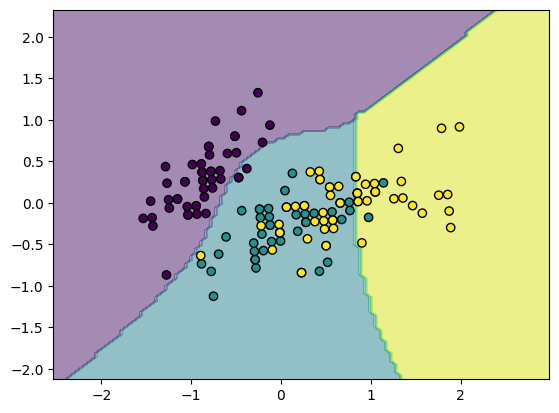

In [4]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data[:, :2])

svm_poly = SVC(kernel='poly', degree=3).fit(X_pca, iris.target)
disp = DecisionBoundaryDisplay.from_estimator(svm_poly, X_pca, response_method="predict", alpha=0.5)
disp.ax_.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target, edgecolor="k")
plt.show()

25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and 
evaluate accuracy.

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gnb = GaussianNB().fit(X_train, y_train)
print(f"Accuracy: {gnb.score(X_test, y_test):.4f}")

Accuracy: 0.9649


26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 
Newsgroups dataset.

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='train')
tfidf = TfidfVectorizer().fit_transform(newsgroups.data)
clf = MultinomialNB().fit(tfidf, newsgroups.target)


KeyboardInterrupt



27. Write a Python program to train an SVM Classifier with different C values and compare the decision 
boundaries visually.

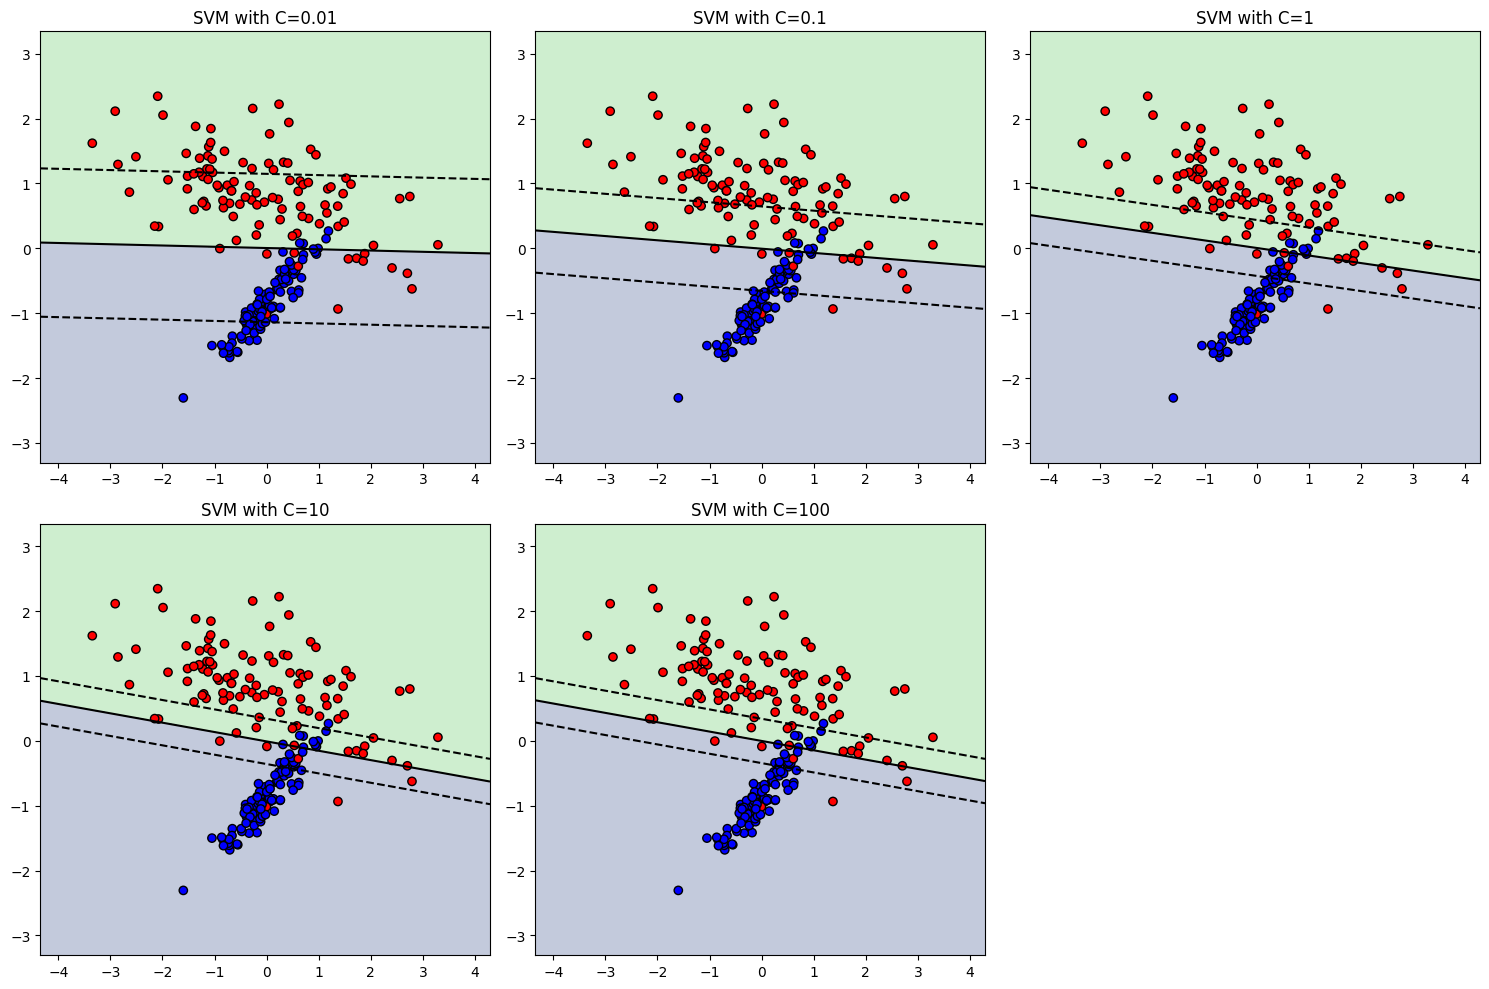

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load a toy dataset (only two features for visualization)
X, y = datasets.make_classification(
    n_samples=300, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define different C values to compare
C_values = [0.01, 0.1, 1, 10, 100]

# Create subplots
plt.figure(figsize=(15, 10))
for i, C in enumerate(C_values, 1):
    # Train SVM with given C
    clf = SVC(kernel='linear', C=C)
    clf.fit(X_train, y_train)

    # Plot decision boundary
    ax = plt.subplot(2, 3, i)
    ax.set_title(f"SVM with C={C}")

    # Create a grid to evaluate model
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and margins
    ax.contourf(xx, yy, Z > 0, alpha=0.3)
    ax.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolors='k')

plt.tight_layout()
plt.show()


28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with 
binary features.

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62        18
           1       0.33      0.25      0.29        12

    accuracy                           0.50        30
   macro avg       0.45      0.46      0.45        30
weighted avg       0.48      0.50      0.48        30



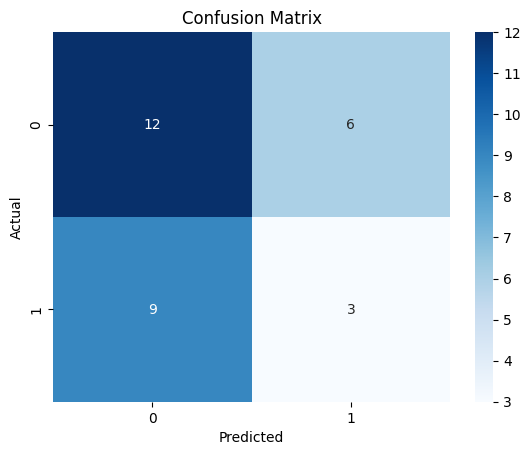

In [9]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple binary dataset
np.random.seed(0)
X = np.random.randint(2, size=(100, 10))  # 100 samples, 10 binary features
y = np.random.randint(2, size=100)        # Binary target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Bernoulli Naïve Bayes
model = BernoulliNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


29. Write a Python program to apply feature scaling before training an SVM model and compare results with 
unscaled data.

In [10]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Generate synthetic dataset
X, y = make_classification(
    n_samples=500, n_features=5, n_informative=3,
    n_redundant=0, random_state=42
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ Train SVM WITHOUT Scaling
svm_unscaled = SVC()
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)

# 2️⃣ Train SVM WITH Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)

# Results Comparison
print("=== Without Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print(classification_report(y_test, y_pred_unscaled))

print("=== With Scaling ===")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print(classification_report(y_test, y_pred_scaled))


=== Without Scaling ===
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        72
           1       0.97      0.95      0.96        78

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150

=== With Scaling ===
Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        72
           1       0.97      0.91      0.94        78

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



30.Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and 
after Laplace Smoothing.

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generate dataset
X, y = make_classification(
    n_samples=300, n_features=5, n_informative=3,
    n_redundant=0, random_state=42
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ GaussianNB without smoothing (default)
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)

# 2️⃣ GaussianNB with simulated Laplace smoothing by adjusting class priors
# Add 1 to class counts (Laplace smoothing idea) and normalize to get pseudo-priors
class_counts = np.bincount(y_train)
smoothed_priors = (class_counts + 1) / (len(y_train) + len(class_counts))

gnb_smoothed = GaussianNB(priors=smoothed_priors)
gnb_smoothed.fit(X_train, y_train)
y_pred_smoothed = gnb_smoothed.predict(X_test)

# Results
print("=== Without Laplace Smoothing ===")
print("Accuracy:", accuracy_score(y_test, y_pred_default))
print(classification_report(y_test, y_pred_default))

print("=== With Simulated Laplace Smoothing (adjusted priors) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_smoothed))
print(classification_report(y_test, y_pred_smoothed))


=== Without Laplace Smoothing ===
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.88      0.88      0.88        48

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90

=== With Simulated Laplace Smoothing (adjusted priors) ===
Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.88      0.88      0.88        48

    accuracy                           0.87        90
   macro avg       0.87      0.87      0.87        90
weighted avg       0.87      0.87      0.87        90



31 Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, 
gamma, kernel).

In [13]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load sample dataset
X, y = datasets.load_breast_cancer(return_X_y=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

# Initialize GridSearch with SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

# Best estimator performance on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



32. Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and 
check it improve accuracy.

=== SVM Without Class Weights ===
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       271
           1       1.00      0.93      0.96        29

    accuracy                           0.99       300
   macro avg       1.00      0.97      0.98       300
weighted avg       0.99      0.99      0.99       300

=== SVM With Class Weights (balanced) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00        29

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



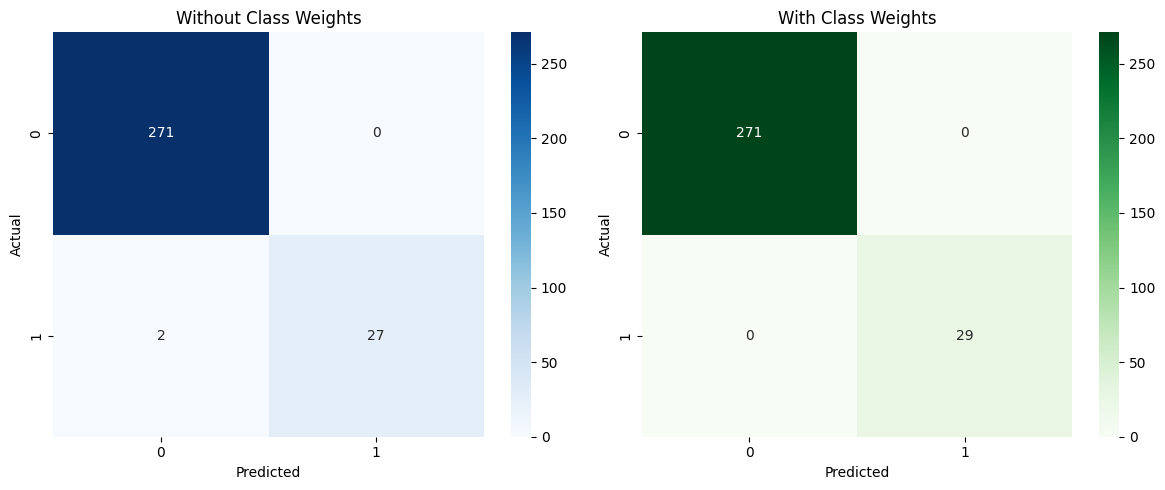

In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
    n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1️⃣ SVM without class weighting
model_no_weight = SVC()
model_no_weight.fit(X_train, y_train)
y_pred_no_weight = model_no_weight.predict(X_test)

print("=== SVM Without Class Weights ===")
print(classification_report(y_test, y_pred_no_weight))
cm1 = confusion_matrix(y_test, y_pred_no_weight)

# 2️⃣ SVM with class weighting
model_weighted = SVC(class_weight='balanced')  # Automatically adjusts weights
model_weighted.fit(X_train, y_train)
y_pred_weighted = model_weighted.predict(X_test)

print("=== SVM With Class Weights (balanced) ===")
print(classification_report(y_test, y_pred_weighted))
cm2 = confusion_matrix(y_test, y_pred_weighted)

# Plot confusion matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axs[0])
axs[0].set_title("Without Class Weights")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", ax=axs[1])
axs[1].set_title("With Class Weights")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


33. Write a Python program to implement a Naïve Bayes classifier for spam detection using email data.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Sample email dataset (texts and labels)
emails = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now.",
    "Hi John, can we reschedule our meeting?",
    "Urgent! Your account has been compromised. Verify your password immediately.",
    "Reminder: your appointment is scheduled for tomorrow.",
    "You have been selected for a chance to get a new iPhone. Act now!",
    "Lunch tomorrow at 1pm?",
    "Save big on your insurance! Limited time offer.",
    "Can you send me the report by Monday?",
    "Free trial of our premium plan. No credit card required.",
    "Let's catch up over coffee next week."
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# Step 2: Convert text data to numerical features
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

# Step 3: Train Naïve Bayes classifier
model = MultinomialNB()
model.fit(X_train_counts, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test_counts)

# Results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and 
compare their accuracy.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset (you can replace this with a real dataset)
emails = [
    "Win a brand new car now!",
    "Are we still meeting for dinner?",
    "You've been selected for a free cruise!",
    "Can you help me with the project?",
    "Limited time offer, claim your prize.",
    "Let's go hiking this weekend.",
    "Earn money quickly without effort!",
    "Please find the report attached.",
    "Your account needs verification urgently.",
    "See you at the game tonight."
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Step 1: Split dataset
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# Step 2: Convert text to features
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3: Train Naïve Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)
nb_preds = nb_model.predict(X_test_vec)

# Step 4: Train SVM Classifier
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_vec, y_train)
svm_preds = svm_model.predict(X_test_vec)

# Step 5: Evaluate and compare
nb_accuracy = accuracy_score(y_test, nb_preds)
svm_accuracy = accuracy_score(y_test, svm_preds)

print(f"Naïve Bayes Accuracy: {nb_accuracy:.2f}")
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, nb_preds))
print("SVM Classification Report:")
print(classification_report(y_test, svm_preds))


Naïve Bayes Accuracy: 0.33
SVM Accuracy: 0.33

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\SAI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SAI\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

36. Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare 
results.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score, classification_report

# Sample dataset
emails = [
    "Congratulations! You've won a free vacation.",
    "Can we meet tomorrow to discuss the project?",
    "Limited time offer! Claim your reward now.",
    "Don't forget our meeting at 10 AM.",
    "Winner! You've been selected for a gift card.",
    "Let's grab lunch this afternoon.",
    "Claim your prize before it's gone!",
    "Looking forward to your presentation.",
    "Exclusive offer just for you!",
    "I'll send the notes after class."
]

labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]  # 1 = spam, 0 = not spam

# Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=42)

# Step 2: Convert text to feature vectors
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 3a: Train Naïve Bayes without feature selection
model_full = MultinomialNB()
model_full.fit(X_train_vec, y_train)
pred_full = model_full.predict(X_test_vec)

# Step 3b: Feature selection (top K features)
k = 10  # number of top features to select
selector = SelectKBest(chi2, k=k)
X_train_selected = selector.fit_transform(X_train_vec, y_train)
X_test_selected = selector.transform(X_test_vec)

# Train Naïve Bayes with selected features
model_selected = MultinomialNB()
model_selected.fit(X_train_selected, y_train)
pred_selected = model_selected.predict(X_test_selected)

# Step 4: Evaluation
acc_full = accuracy_score(y_test, pred_full)
acc_selected = accuracy_score(y_test, pred_selected)

print(f"Accuracy without feature selection: {acc_full:.2f}")
print(f"Accuracy with top {k} features: {acc_selected:.2f}")

print("\nClassification Report (Full Features):")
print(classification_report(y_test, pred_full))
print("Classification Report (Selected Features):")
print(classification_report(y_test, pred_selected))


Accuracy without feature selection: 0.67
Accuracy with top 10 features: 0.67

Classification Report (Full Features):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Classification Report (Selected Features):
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



37.Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast 
Cancer dataset and compare their accuracy.

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kernels to test
kernels = ['linear', 'poly', 'rbf']

# Train and compare
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Linear Kernel Accuracy: 0.9649
Poly Kernel Accuracy: 0.9415
Rbf Kernel Accuracy: 0.9357


38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the 
average accuracy.

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer

# Load data
X, y = load_breast_cancer(return_X_y=True)

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = SVC(kernel='linear')

# Cross-validation accuracy
scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
print("Fold Accuracies:", scores)
print("Average Accuracy:", scores.mean())


Fold Accuracies: [0.94736842 0.92982456 0.95614035 0.93859649 0.96460177]
Average Accuracy: 0.9473063188945815


39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare 
performance.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Test different class priors
priors_list = [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]
for priors in priors_list:
    model = GaussianNB(priors=priors)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Priors {priors} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Priors [0.3, 0.7] Accuracy: 0.9474
Priors [0.5, 0.5] Accuracy: 0.9415
Priors [0.7, 0.3] Accuracy: 0.9357


40.Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and 
compare accuracy.

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM model
svm = SVC(kernel='linear')

# RFE
rfe = RFE(svm, n_features_to_select=10)
rfe.fit(X_train, y_train)
y_pred_rfe = rfe.predict(X_test)

# Compare with full model
svm_full = SVC(kernel='linear')
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)

print("Accuracy with full features:", accuracy_score(y_test, y_pred_full))
print("Accuracy with RFE selected features:", accuracy_score(y_test, y_pred_rfe))


Accuracy with full features: 0.9649122807017544
Accuracy with RFE selected features: 0.9298245614035088


41. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and 
F1-Score instead of accuracy.

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Precision: 0.9636363636363636
Recall: 0.9814814814814815
F1-Score: 0.9724770642201835


42.Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss 
(Cross-Entropy Loss).

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)

# Evaluate with Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss: {logloss:.4f}")


Log Loss: 0.4899


43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn.

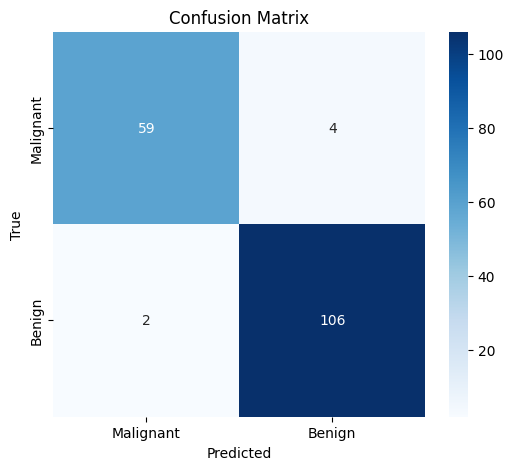

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize with seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Malignant", "Benign"], yticklabels=["Malignant", "Benign"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


44. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute 
Error (MAE) instead of MSE.

In [27]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=0.1, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Regressor
model = SVR(kernel='linear')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate with Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 0.2979


45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC 
score.

ROC-AUC Score: 0.9922


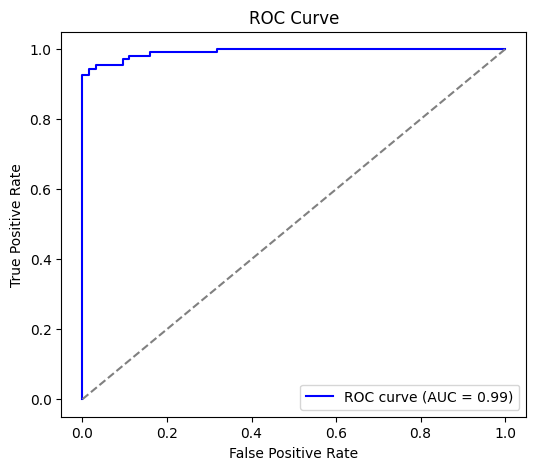

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naïve Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


46. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

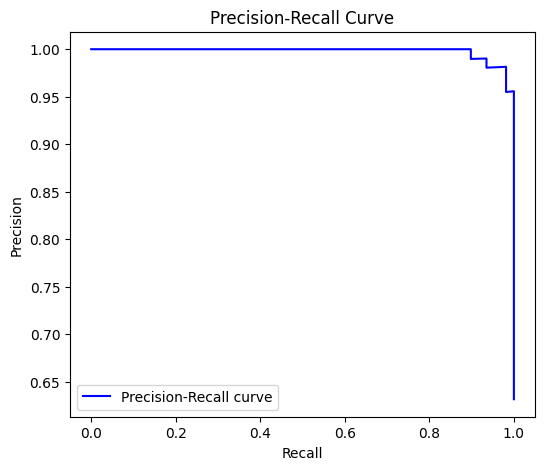

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

# Load data
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train SVM Classifier
model = SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()
